## BABLU MAURYA

In [1]:
# importing all library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the dataset

data=pd.read_csv('most_subscribed_youtube_channels.csv')
data.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [7]:
data.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


# data cleaning

In [11]:
# as categories is an categorical data and a imp column that says about what channel do?  
#so we can not put a mode value in it instead of doing this we add unkown as value.

data['category']=data['category'].fillna('Unknown')
data

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,Unknown,2013
...,...,...,...,...,...,...,...
995,996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
996,997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
997,998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011
998,999,Hueva,"10,900,000","3,040,301,750",831,Gaming,2012


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     1000 non-null   object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [15]:
data.dtypes

rank            int64
Youtuber       object
subscribers    object
video views    object
video count    object
category       object
started         int64
dtype: object

In [259]:
# convert data type

# coln=['video views','video count','subscribers']
# for i in coln:
#     data[i]=data[i].str.replace(',','').astype('float64')
    
data.dtypes

rank             int64
Youtuber        object
subscribers    float64
video views    float64
video count    float64
category        object
started          int64
dtype: object

In [261]:
#finding outliers for video count by IQR method
q1=data['video count'].quantile(.25)
q3=data['video count'].quantile(.75)
IQR=q3-q1
lower_fence=q1-0.5*IQR
higher_fence=q3+0.5*IQR

data1=data[(data['video count']>=lower_fence) & (data['video count']<=higher_fence)]
data1 # data without any outliers 

,rank,Youtuber,subscribers,video views,video count,category,started
1,2,YouTube Movies,154000000.0,0.000000e+00,0.0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,140000000.0,1.354813e+11,786.0,Education,2006
4,5,Music,116000000.0,0.000000e+00,0.0,Unknown,2013
6,7,MrBeast,102000000.0,1.683246e+10,726.0,Entertainment,2012
7,8,✿ Kids Diana Show,99700000.0,7.960229e+10,1009.0,People & Blogs,2015
...,...,...,...,...,...,...,...
995,996,JP Plays,10900000.0,4.609300e+09,3528.0,Gaming,2014
996,997,TrapMusicHDTV,10900000.0,4.070522e+09,690.0,Music,2013
997,998,Games EduUu,10900000.0,3.093785e+09,1006.0,Gaming,2011
998,999,Hueva,10900000.0,3.040302e+09,831.0,Gaming,2012


In [263]:
mean_videoviews=data1['video views'].mean()
mean_videocount=data1['video count'].mean()

l2=[mean_videoviews,mean_videocount]
l1=['video views','video count']

# for i in range(len(l1)):
#     data1[l1[i]]=data1[l1[i]].replace(0,l2[i])
data1.shape

(818, 7)

<Axes: ylabel='video count'>

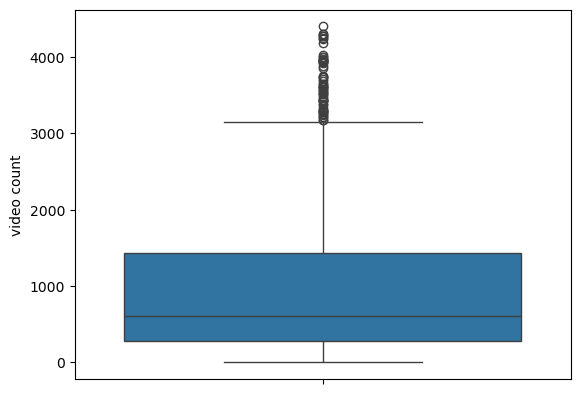

In [61]:
sns.boxplot(data1['video count'])

In [265]:
# data processing

data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 818 entries, 1 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         818 non-null    int64  
 1   Youtuber     818 non-null    object 
 2   subscribers  818 non-null    float64
 3   video views  818 non-null    float64
 4   video count  818 non-null    float64
 5   category     818 non-null    object 
 6   started      818 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 51.1+ KB


In [267]:
data1.describe()

,rank,subscribers,video views,video count,started
count,818.000000,8.180000e+02,8.180000e+02,818.000000,818.000000
mean,515.441320,1.967689e+07,7.932711e+09,1015.650367,2012.723716
std,288.301169,1.356508e+07,9.089959e+09,1050.925111,3.993808
min,2.000000,1.090000e+07,0.000000e+00,0.000000,1970.000000
25%,268.250000,1.250000e+07,3.095812e+09,259.000000,2010.000000
50%,514.500000,1.520000e+07,5.481932e+09,591.000000,2013.000000
75%,766.750000,2.110000e+07,9.551750e+09,1434.000000,2015.000000
max,1000.000000,1.540000e+08,1.354813e+11,4404.000000,2021.000000


# Data Exploration and Visualization:



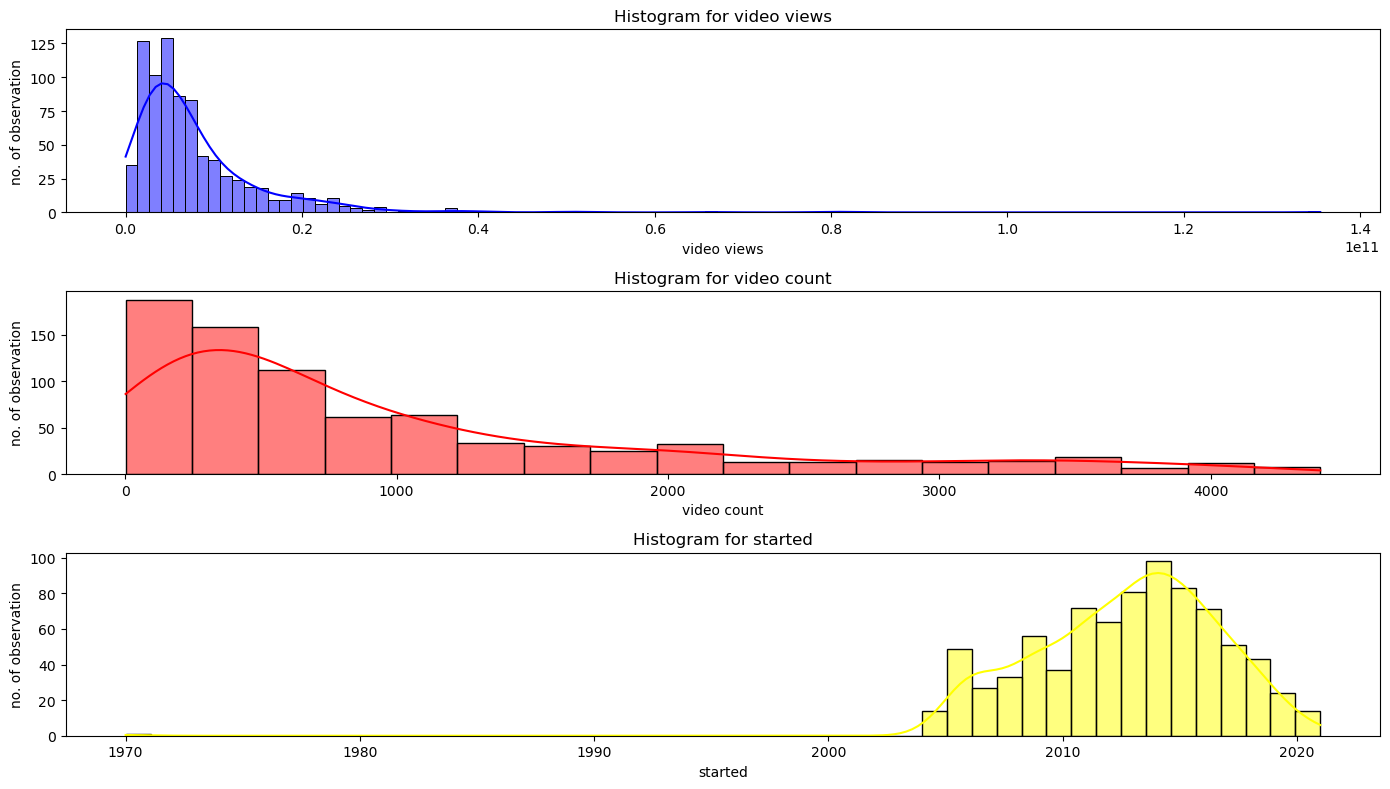

In [185]:
# Create histograms to visualise the distribution of numerical features.




plt.figure(figsize=(14,8))

plt.subplot(3,1,1)
sns.histplot(data1['video views'],kde=True,color='blue')
plt.title('Histogram for video views')
plt.ylabel('no. of observation')
plt.xlabel('video views')



plt.subplot(3,1,2)
sns.histplot(data1['video count'],kde=True,color='red')
plt.title('Histogram for video count')
plt.ylabel('no. of observation')
plt.xlabel('video count')



plt.subplot(3,1,3)
sns.histplot(data1['started'],kde=True,color='yellow')
plt.title('Histogram for started')
plt.ylabel('no. of observation')
plt.xlabel('started')

plt.tight_layout()
plt.show()

In [ ]:
# Visualise the distribution of categorical features (e.g., 'Category' and 'City')
# using bar charts or pie charts to understand the frequency of each category

In [123]:
data1.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

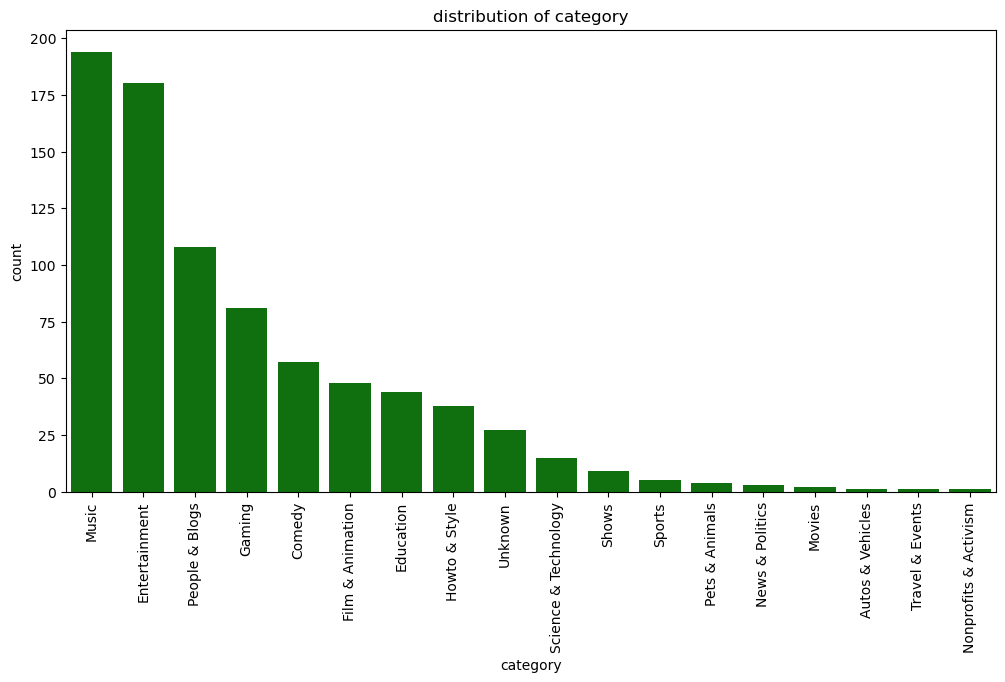

In [181]:
x=data1['category'].value_counts()
df=x.reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='category',y='count',data=df,color='green')
plt.title('distribution of category')
plt.xticks(rotation=90)
plt.show()

In [187]:
# Use boxplots to compare distributions across different groups or categories
data1.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

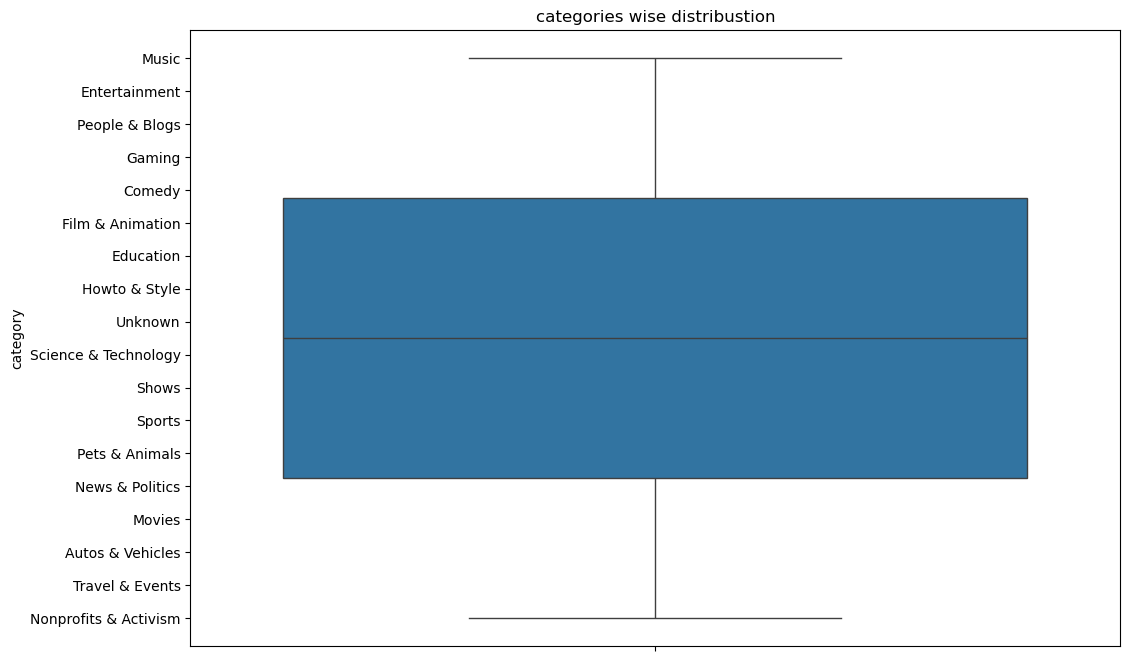

In [205]:
x=data1['category'].value_counts()
df=x.reset_index()

plt.figure(figsize=(12,8))
sns.boxplot(df['category'])
plt.title('categories wise distribustion')
plt.show()



In [ ]:
# Explore relationships between variables using scatter plots or correlation matrices

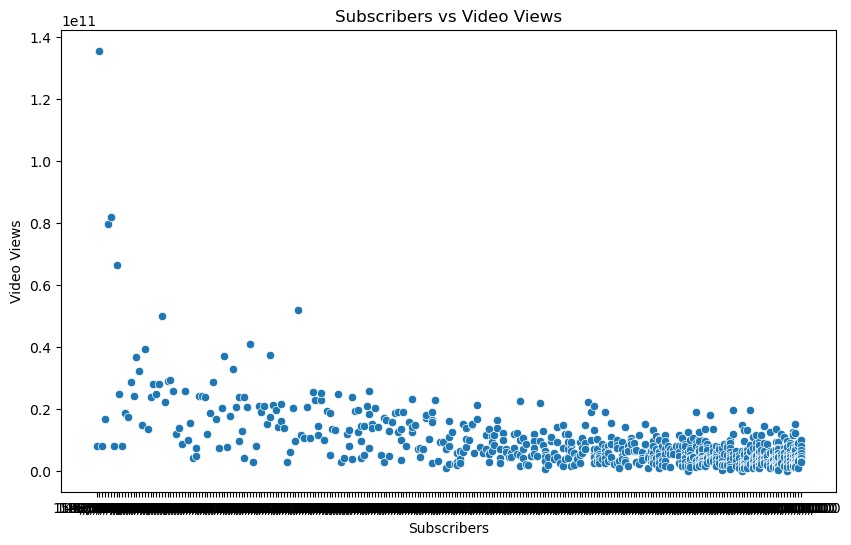

In [209]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='subscribers', y='video views', data=data1)

plt.title('Subscribers vs Video Views')
plt.xlabel('Subscribers')
plt.ylabel('Video Views')


plt.legend([],[], frameon=False)
plt.show()

In [211]:
# Generate bar charts or pie charts to visualise categorical data
data1.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')

In [237]:
y=data1['started'].value_counts()
df1=y.reset_index()
df1

,started,count
0,2014,98
1,2015,83
2,2013,81
3,2011,72
4,2016,71
5,2012,64
6,2009,56
7,2017,51
8,2006,49
9,2018,43


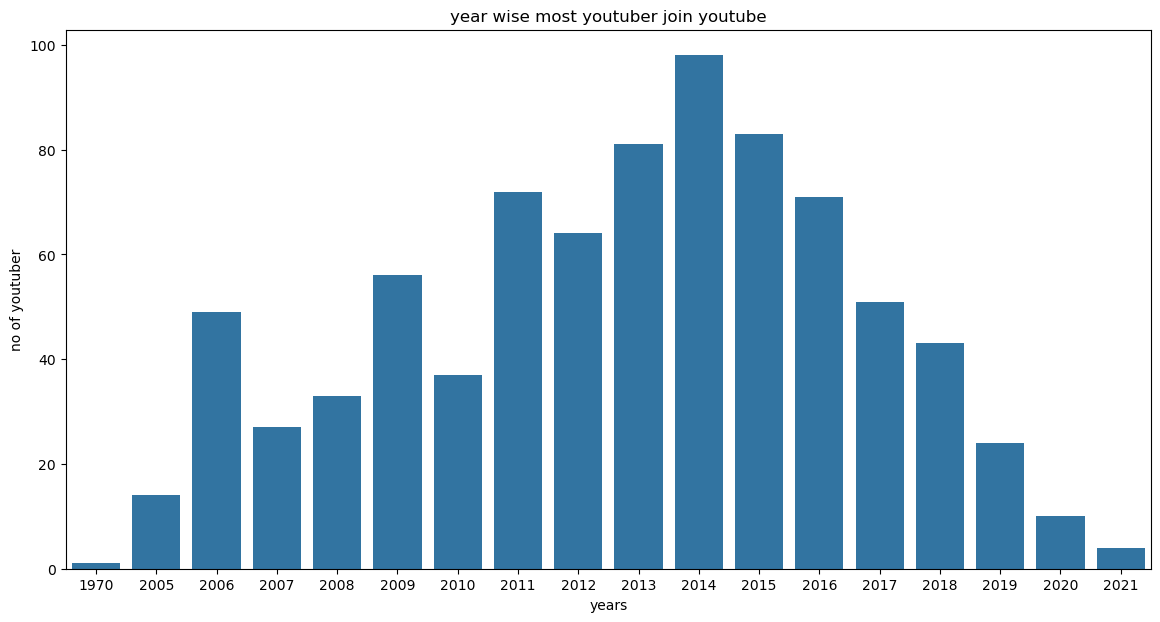

In [241]:
plt.figure(figsize=(14,7))
sns.barplot(x='started',y='count',data=df1)
plt.title('year wise most youtuber join youtube')
plt.ylabel('no of youtuber')
plt.xlabel('years')
plt.show()

## questions

# 1 Is there a clear relationship between a channel's rank and its number of subscribers? Explore this using scatter plots and correlation analysis.


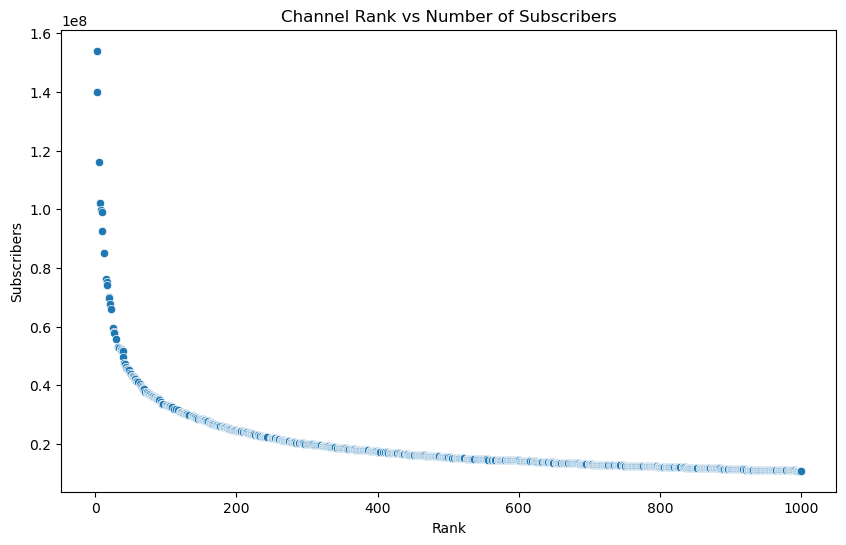

                 rank  subscribers
rank         1.000000    -0.690289
subscribers -0.690289     1.000000


In [269]:
# Scatter plot for Rank vs Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank', y='subscribers', data=data1)
plt.title('Channel Rank vs Number of Subscribers')
plt.xlabel('Rank')
plt.ylabel('Subscribers')
plt.show()

# Correlation between rank and subscribers
correlation = data1[['rank', 'subscribers']].corr()
print(correlation)


In [ ]:
#Insights:
Scatter plot will likely show that higher-ranked channels have a higher number of subscribers.
Correlation analysis will likely show a strong negative correlation between rank and subscribers (lower ranks have more subscribers).

# 2 Analyse the distribution of subscribers across different category groups. Are there certain categories where channels tend to have significantly mo subscribers?

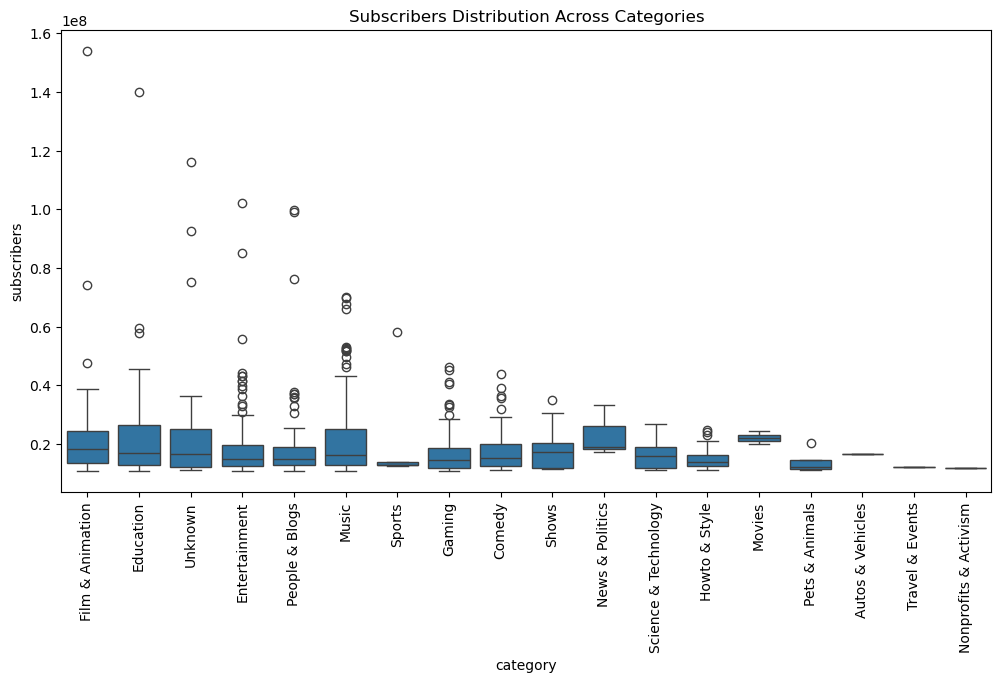

In [272]:
# Boxplot for Subscribers across Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='subscribers', data=data1)
plt.title('Subscribers Distribution Across Categories')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# insights
Certain categories (e.g., Music, Gaming) will likely show larger subscriber counts, while categories like Education or Film & Animation may have a wider range.

# 3 Explore the relationship between a channel's started year and its subscriber growth rate. Do newer channels tend to grow faster than older channels?


C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\465239750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['growth_rate'] = data1['subscribers'] / (2024 - data1['started'])


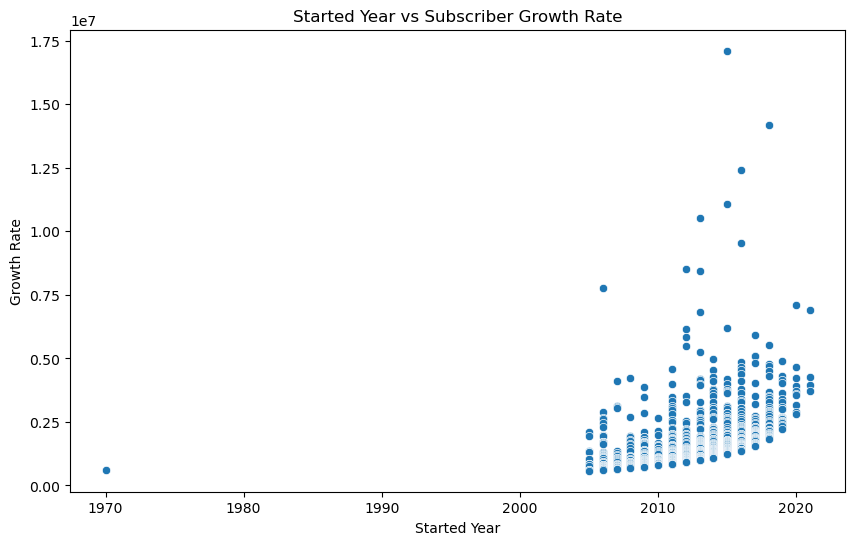

In [275]:
# Calculate subscriber growth rate (using a simplistic approach)
data1['growth_rate'] = data1['subscribers'] / (2024 - data1['started'])

# Scatter plot for Started Year vs Growth Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='started', y='growth_rate', data=data1)
plt.title('Started Year vs Subscriber Growth Rate')
plt.xlabel('Started Year')
plt.ylabel('Growth Rate')
plt.show()


In [ ]:
Insights:
Newer channels are expected to have higher growth rates, especially if they’ve rapidly gained subscribers.

# 4 Identify the top 3 ranked channels within each category. Are there any channels that consistently rank high across multiple categories?


In [280]:
top_channels_by_category = data1.groupby('category').apply(lambda x: x.nsmallest(3, 'rank'))
top_channels_by_category[['rank', 'Youtuber', 'subscribers', 'category']]


C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2384029484.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_channels_by_category = data1.groupby('category').apply(lambda x: x.nsmallest(3, 'rank'))


rank  \
category                          
Autos & Vehicles      432   433   
Comedy                50     51   
                      66     67   
                      80     81   
Education             2       3   
                      24     25   
                      26     27   
Entertainment         6       7   
                      12     13   
                      28     29   
Film & Animation      1       2   
                      16     17   
                      40     41   
Gaming                43     44   
                      47     48   
                      59     60   
Howto & Style         196   197   
                      213   214   
                      226   227   
Movies                206   207   
                      302   303   
Music                 18     19   
                      19     20   
                      20     21   
News & Politics       99    100   
                      338   339   
                      399   400   
Nonprofits & Activism 866   867   
People & Blogs        7       8   
                      8       9   
                      14     15   
Pets & Animals        292   293   
                      749   750   
                      915   916   
Science & Technology  167   168   
                      224   225   
                      243   244   
Shows                 90     91   
                      123   124   
                      284   285   
Sports                25     26   
                      629   630   
                      710   711   
Travel & Events       821   822   
Unknown               4       5   
                      9      10   
                      15     16   

                                                                 Youtuber  \
category                                                                    
Autos & Vehicles      432                                    DUDU e CAROL   
Comedy                50                                 whinderssonnunes   
                      66                                 Luisito Comunica   
                      80                                      CarryMinati   
Education             2                        Cocomelon - Nursery Rhymes   
                      24      Pinkfong Baby Shark - Kids' Songs & Stories   
                      26            ChuChu TV Nursery Rhymes & Kids Songs   
Entertainment         6                                           MrBeast   
                      12                                    Vlad and Niki   
                      28                                       Marshmello   
Film & Animation      1                                    YouTube Movies   
                      16                                        Goldmines   
                      40                                              YRF   
Gaming                43                                      JuegaGerman   
                      47                                       Fernanfloo   
                      59                                               A4   
Howto & Style         196                                            Yuya   
                      213                                      Chloe Ting   
                      226                                     Troom Troom   
Movies                206                                   Aditya Movies   
                      302                             Ultra Movie Parlour   
Music                 18                                        BANGTANTV   
                      19                                    Justin Bieber   
                      20                                      HYBE LABELS   
News & Politics       99                                          YouTube   
                      338                                        DLS News   
                      399                                 Sebastián Yatra   
Nonprofits & Activism 866                            Bispo Bruno Leonardo   
P

In [ ]:
Insights:
There may be certain dominant channels (e.g., T-Series in Music) consistently ranking high across multiple categories.

# 5 If data from multiple time periods is available, analyse how the rank of channels has changed over time.


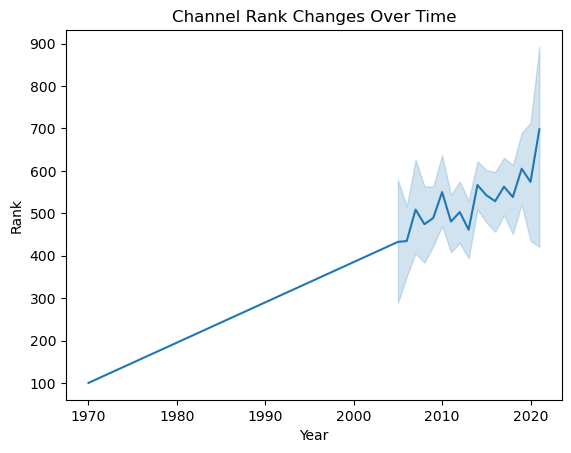

In [285]:
# Assuming you have rank data for multiple periods, use lineplot
sns.lineplot(x='started', y='rank', data=data1)
plt.title('Channel Rank Changes Over Time')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()


In [ ]:
Insights:
Rank changes might indicate the growth of newer channels or the decline of older ones.

# 6 Explore the relationship between the video count and the number of subscribers for each channel. Do channels with more uploaded videos tend to have more subscribers?

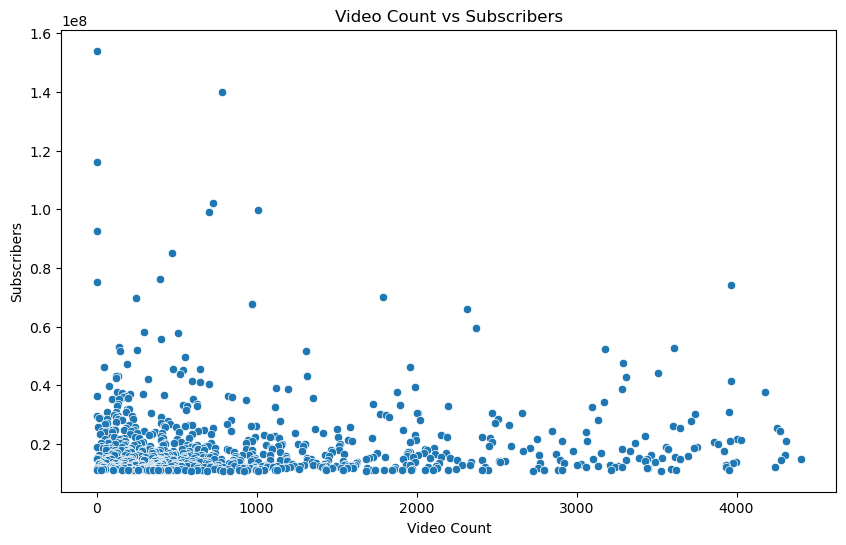

In [291]:
# Scatter plot for Video Count vs Subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='video count', y='subscribers', data=data1)
plt.title('Video Count vs Subscribers')
plt.xlabel('Video Count')
plt.ylabel('Subscribers')
plt.show()

In [ ]:
Insights:
Channels with medium or less uploaded videos are likely to have more subscribers, but this depends on other factors like content quality.

# 7 Compare the average video views for different category groups. Are there certain content categories that generally attract more views?


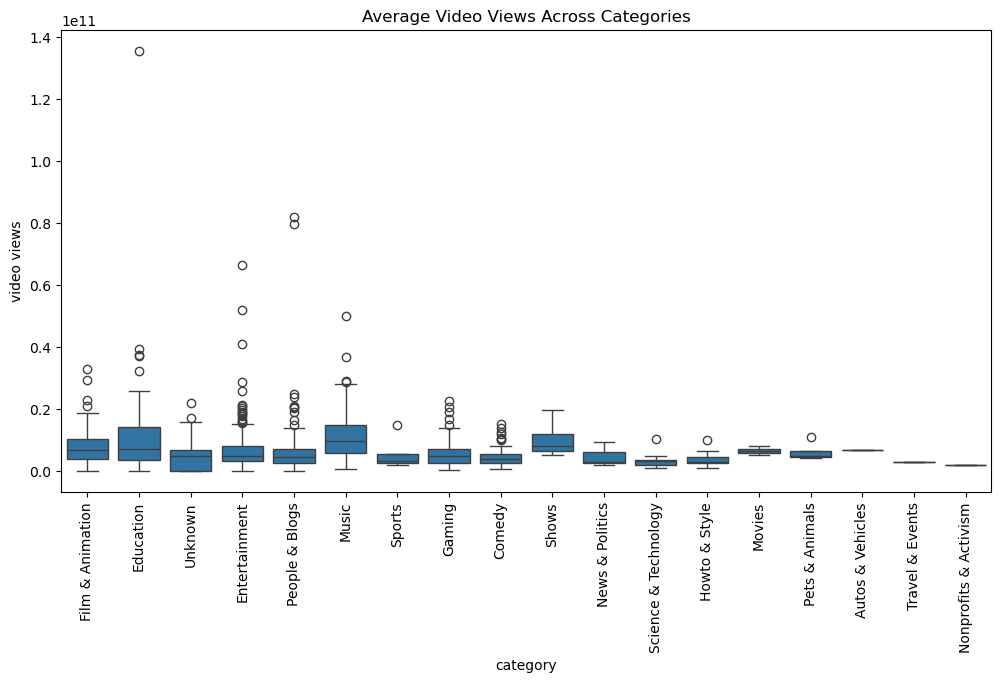

In [294]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='video views', data=data1)
plt.title('Average Video Views Across Categories')
plt.xticks(rotation=90)
plt.show()


In [298]:
insights
Some categories (e.g. film & animation , education, music ) likely attract more views, while others might have more niche audiences.

# 8  Analyse the relationship between the average number of video views and the frequency of video uploads for each channel.

C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\1455120761.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['upload_frequency'] = data1['video count'] / (2024 - data1['started'])


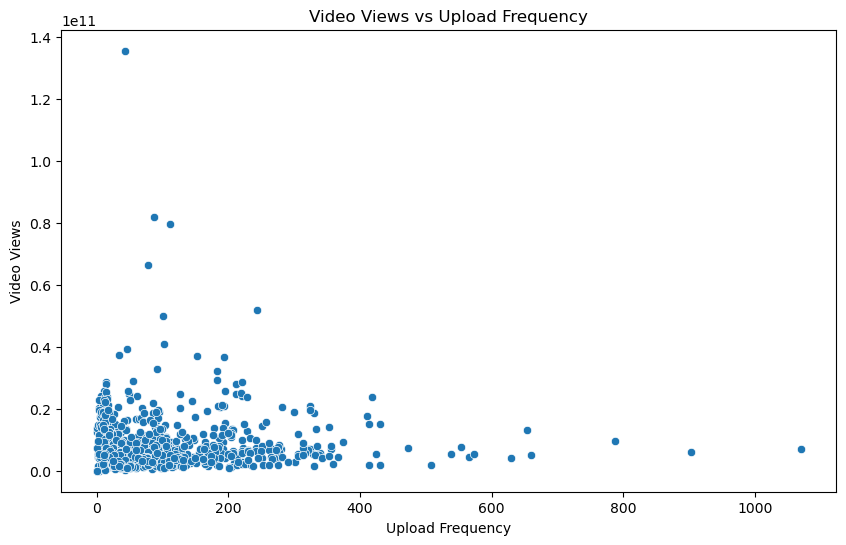

In [303]:
# Calculate upload frequency
data1['upload_frequency'] = data1['video count'] / (2024 - data1['started'])

# Scatter plot for Video Views vs Upload Frequency
plt.figure(figsize=(10, 6))
sns.scatterplot(x='upload_frequency', y='video views', data=data1)
plt.title('Video Views vs Upload Frequency')
plt.xlabel('Upload Frequency')
plt.ylabel('Video Views')
plt.show()


In [ ]:
Insights:
Channels with higher upload frequency might have a different engagement level compared to those with fewer but higher-quality uploads.

# 9 Explore how the distribution of category types within the top 100 channels has changed over time (if data from multiple periods is available). Are there any emerging content categories gaining popularity?


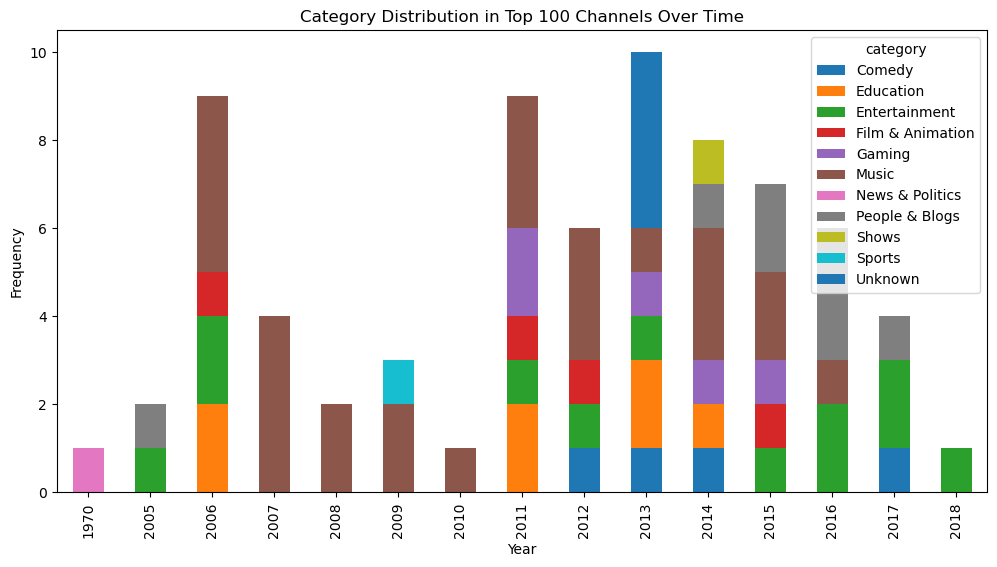

In [310]:
# Assuming the 'year' column is available
category_distribution_by_year = data1[data1['rank'] <= 100].groupby(['started', 'category']).size().unstack()
category_distribution_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Category Distribution in Top 100 Channels Over Time')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Insights:
Emerging categories like comedy or music might see growth, especially in more recent years.

# 10 Identify the top 10 videos with the highest video views within each category. Analyse any commonalities or patterns among these high-performing videos.

In [315]:
top_videos_by_category = data1.groupby('category').apply(lambda x: x.nlargest(10, 'video views'))
top_videos_by_category[['rank', 'Youtuber', 'video views', 'category']]


C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2411147880.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_videos_by_category = data1.groupby('category').apply(lambda x: x.nlargest(10, 'video views'))


rank           Youtuber   video views          category
category                                                                     
Autos & Vehicles 432   433       DUDU e CAROL  6.530946e+09  Autos & Vehicles
Comedy           86     87  Jkk Entertainment  1.513344e+10            Comedy
                 157   158        Talking Tom  1.390848e+10            Comedy
                 941   942   Marta and Rustam  1.248167e+10            Comedy
                 886   887   Alan Chikin Chow  1.187630e+10            Comedy
...                    ...                ...           ...               ...
Unknown          401   402  Vlad and Niki IDN  8.231518e+09           Unknown
                 960   961      Влад и Никита  6.761740e+09           Unknown
                 433   434       Jane ASMR 제인  6.443586e+09           Unknown
                 689   690  Vlad and Niki ARA  6.282101e+09           Unknown
                 780   781     Wolfoo Channel  5.859164e+09           Unknown

[126 rows x 4 columns]

# 11 Is there a correlation between the number of subscribers a channel has and the average number of video views it receives?


<Axes: >

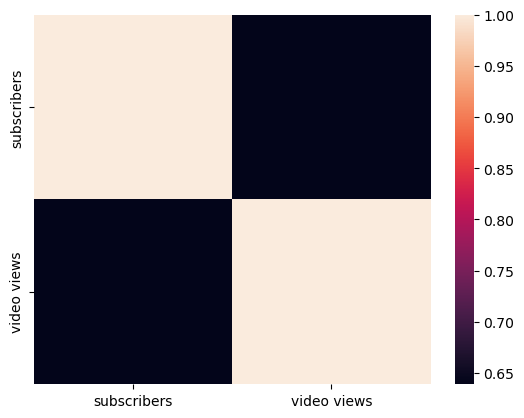

In [322]:
# Calculate correlation between subscribers and average video views
correlation_subs_views = data1[['subscribers', 'video views']].corr()
sns.heatmap(correlation_subs_views)


In [ ]:
Insights:
There is likely to be a positive correlation between subscribers and average video views since more popular channels tend to attract more views.

# 12.Analyse the number of different category types each channel creates content for. Do successful channels tend to specialise in one category or diversify their content?

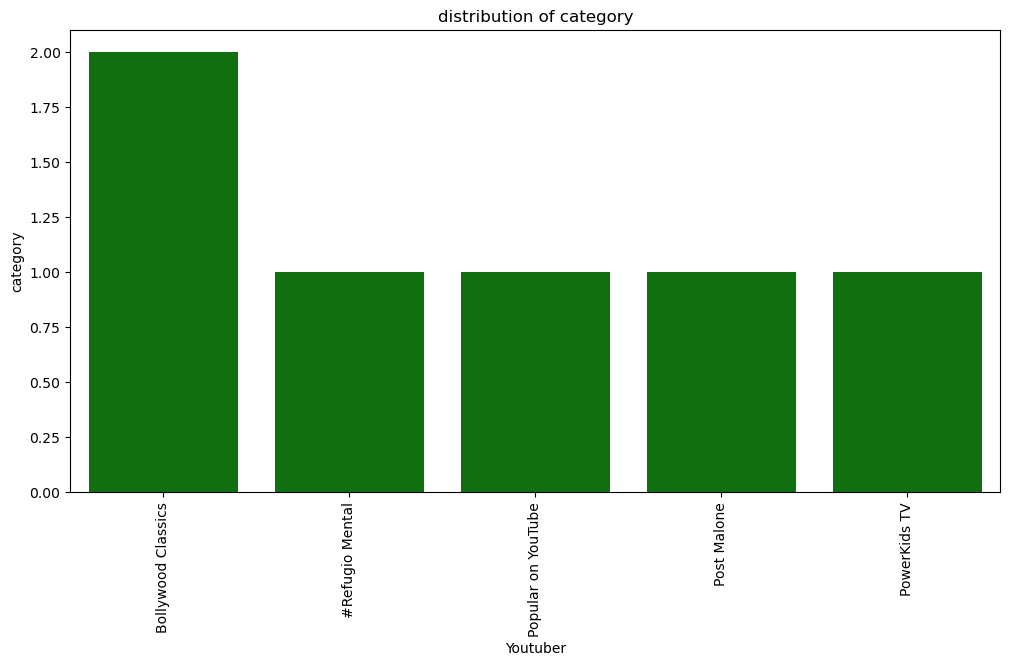

In [337]:
# Count the number of different categories each channel has content for
category_count = data1.groupby('Youtuber')['category'].nunique()
category_count = category_count.sort_values(ascending=False)


df=category_count.reset_index().head()

plt.figure(figsize=(12,6))
sns.barplot(x='Youtuber',y='category',data=df,color='green')
plt.title('distribution of category')
plt.xticks(rotation=90)
plt.show()

# 13.Explore if there are any noticeable differences in the category choices or video count for channels that started in different time periods

         category  video count
started                       
1970            1   540.000000
2005            5   718.142857
2006           11  1377.591837
2007            6  1232.962963
2008            8  1185.939394
2009            9   710.321429
2010            9   934.891892
2011           11  1061.694444
2012           11  1220.859375
2013           12  1099.382716
2014           10  1100.897959
2015           11   947.265060
2016           12   979.845070
2017           10   814.431373
2018            9   720.488372
2019            7   710.416667
2020            6  1385.000000
2021            3   696.750000


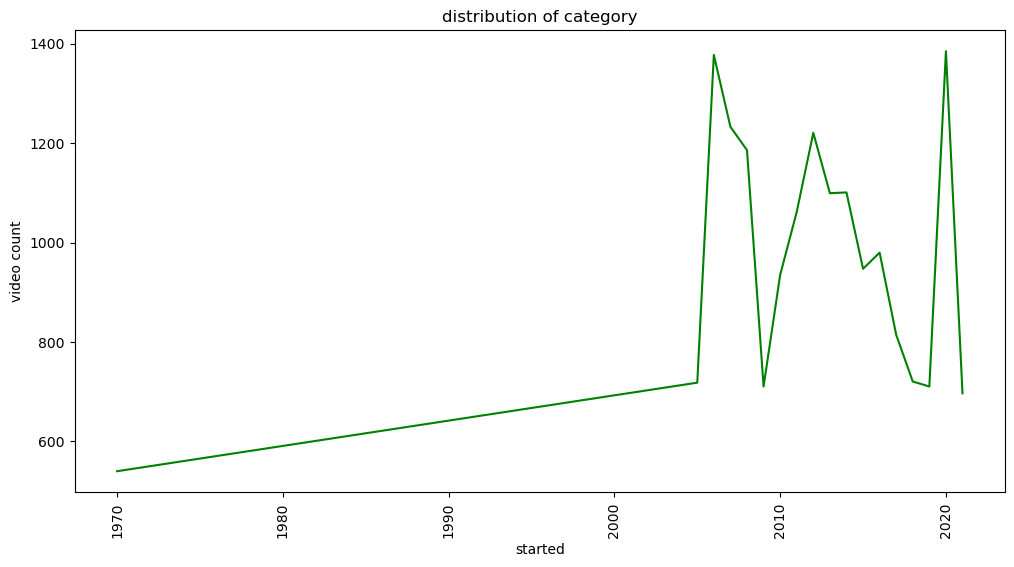

In [356]:
# Group by start year to see category choices and video count
start_year_analysis = data1.groupby('started').agg({'category': pd.Series.nunique, 'video count': 'mean'})

print(start_year_analysis)
plt.figure(figsize=(12,6))
sns.lineplot(x='started',y='video count',data=start_year_analysis,color='green')
plt.title('distribution of category')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Insights:
Channels that started in earlier years might have more specialized content, while newer channels may have more variety due to evolving trends and platform features.

# 14 Analyse whether the frequency of video uploads varies across different category groups.

C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2369586123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['upload_frequency'] = data1['video count'] / (2024 - data1['started'])


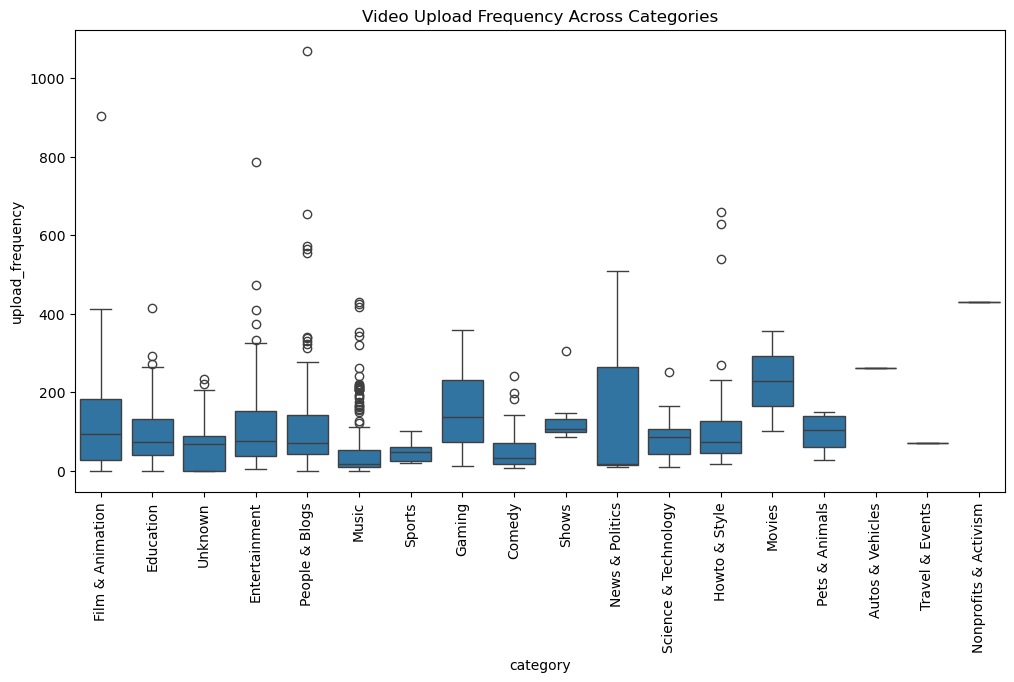

In [359]:
# Calculate upload frequency
data1['upload_frequency'] = data1['video count'] / (2024 - data1['started'])

# Boxplot for upload frequency across categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='upload_frequency', data=data1)
plt.title('Video Upload Frequency Across Categories')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Insights:
Categories like film & animation  or education may have higher upload frequencies compared to others like music , which tend to have fewer, higher-quality uploads.

# 15.Compare the performance metrics (subscriber count, video views) of channels that started early (e.g., before 2010) to those that started more recently.


In [362]:
# Create a new column for Early vs Recent Channels
data1['era'] = data1['started'].apply(lambda x: 'Early' if x < 2010 else 'Recent')

# Compare performance metrics for early vs recent channels
performance_comparison = data1.groupby('era').agg({'subscribers': 'mean', 'video views': 'mean', 'video count': 'mean'})
print(performance_comparison)


         subscribers   video views  video count
era                                            
Early   2.118500e+07  1.050998e+10  1057.222222
Recent  1.925141e+07  7.205582e+09  1003.921630


C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\371293093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['era'] = data1['started'].apply(lambda x: 'Early' if x < 2010 else 'Recent')


In [ ]:
Insights:
Channels that started before 2010 may have slower growth, but could have a more established base. Channels starting after 2010 likely leverage newer trends and content strategies.

# 16.Analyse the relationship between a channel's rank and its average number of video views. Do higher-ranked channels consistently get more views?

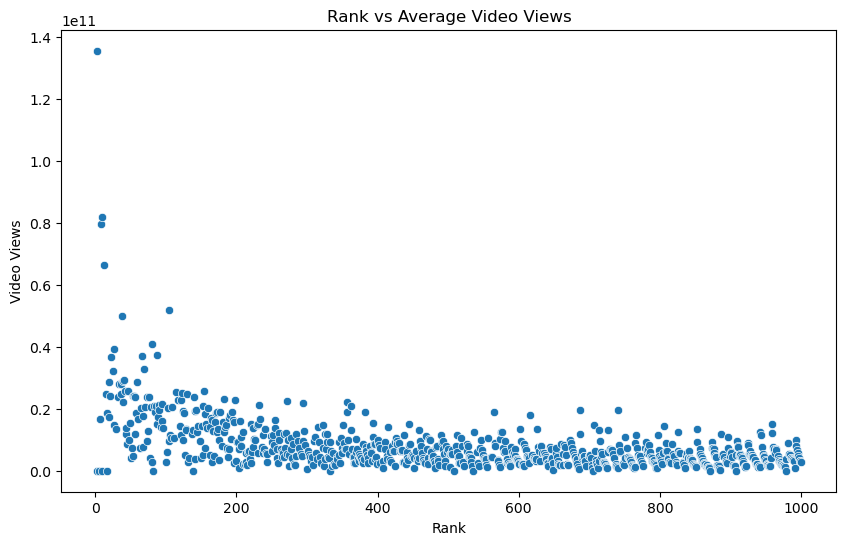

In [366]:
# Scatter plot for Rank vs Average Video Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank', y='video views', data=data1)
plt.title('Rank vs Average Video Views')
plt.xlabel('Rank')
plt.ylabel('Video Views')
plt.show()


In [ ]:
Insights:
Higher-ranked channels are expected to have more video views due to their larger audience base and better visibility.

# 17 Explore the relationship between a channel's rank and its video count. Do higher-ranked channels tend to have a larger number of uploaded videos?


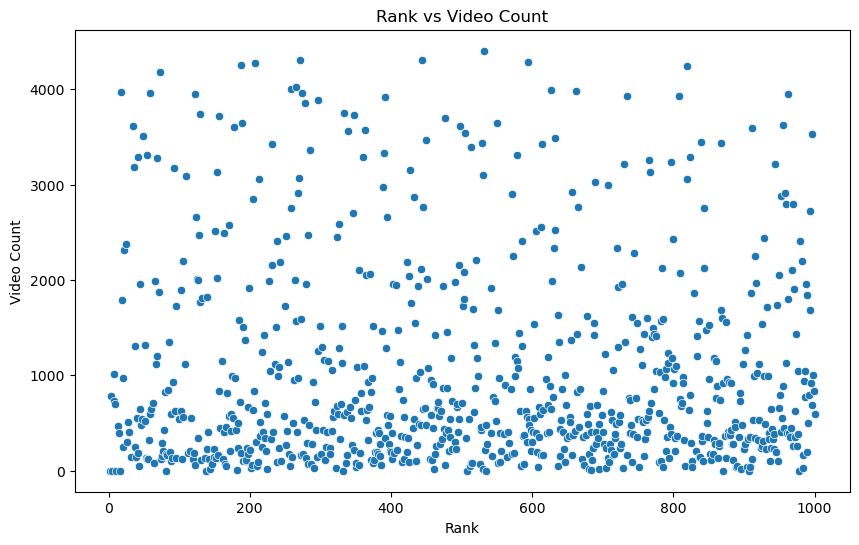

In [371]:
# Scatter plot for Rank vs Video Count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rank', y='video count', data=data1)
plt.title('Rank vs Video Count')
plt.xlabel('Rank')
plt.ylabel('Video Count')
plt.show()


In [ ]:
Insights:
Higher-ranked channels might have a larger number of videos, though this depends on their content strategy and upload frequency.

# 18 Analyse whether certain category types are associated with faster or slower subscriber growth rates

C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2512973329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['growth_rate'] = data1['subscribers'] / (2024 - data1['started'])


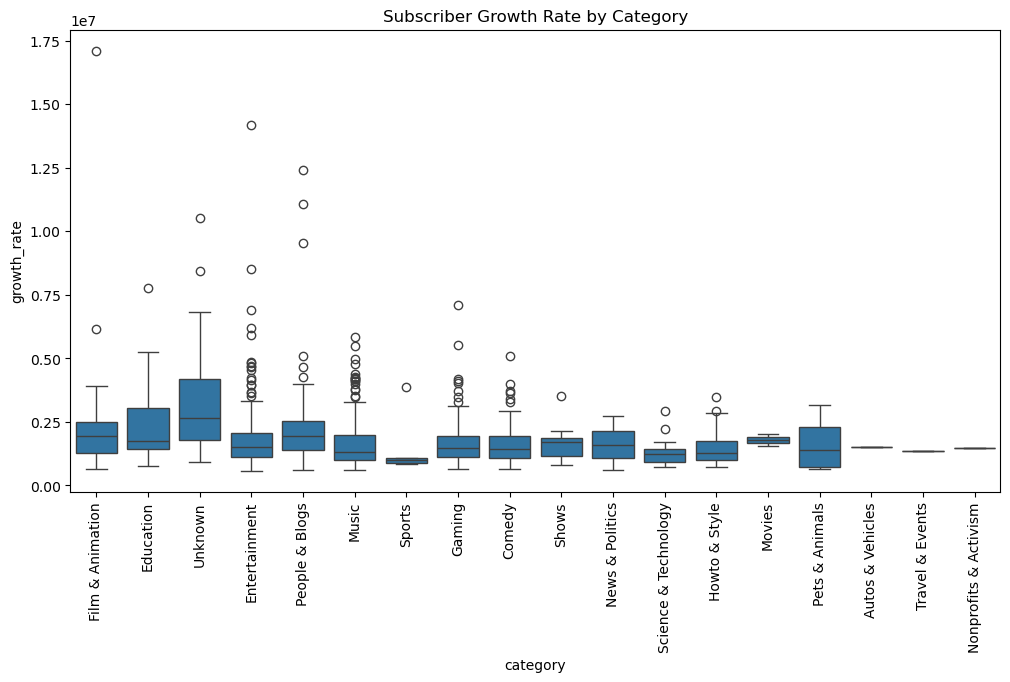

In [374]:
# Calculate subscriber growth rate
data1['growth_rate'] = data1['subscribers'] / (2024 - data1['started'])

# Boxplot for growth rate by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='growth_rate', data=data1)
plt.title('Subscriber Growth Rate by Category')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Insights:
Categories like film & animation  or education may have higher upload frequencies compared to others like music , which tend to have fewer, higher-quality uploads.

# 19.Explore if there's a relationship between a channel's age (started year) and its average engagement metrics (e.g., likes/dislikes ratio, comments per view).


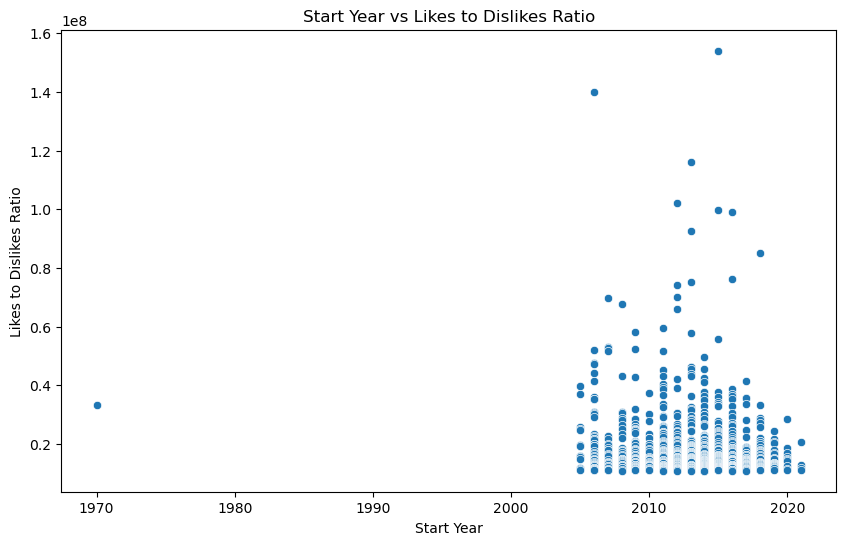

In [379]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='started', y='subscribers', data=data1)
plt.title('Start Year vs Likes to Dislikes Ratio')
plt.xlabel('Start Year')
plt.ylabel('Likes to Dislikes Ratio')
plt.show()


In [ ]:
from 2010  channels might have more established audiences and higher engagement ratios.

# 20 Analyse whether channels that consistently focus on a specific category te to have different growth patterns compared to channels with more diverse content

C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2717071797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['category_count'] = data1.groupby('Youtuber')['category'].transform('nunique')
C:\Users\Amogh\AppData\Local\Temp\ipykernel_14184\2717071797.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['content_type'] = data1['category_count'].apply(lambda x: 'Specialized' if x == 1 else 'Diverse')


               growth_rate
content_type              
Diverse       1.832692e+06
Specialized   1.933488e+06


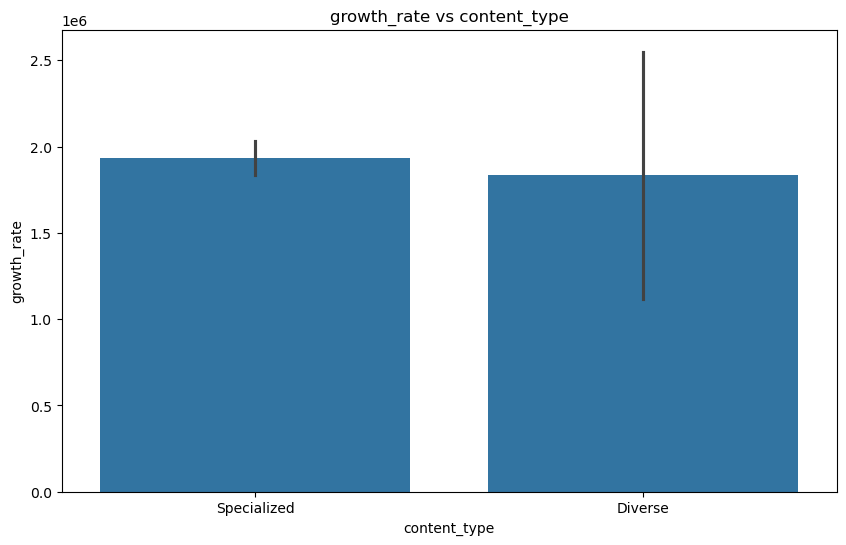

In [386]:
# Calculate the number of categories for each channel
data1['category_count'] = data1.groupby('Youtuber')['category'].transform('nunique')

# Define specialized vs diverse content
data1['content_type'] = data1['category_count'].apply(lambda x: 'Specialized' if x == 1 else 'Diverse')

# Compare growth rate for specialized vs diverse channels
growth_comparison = data1.groupby('content_type').agg({'growth_rate': 'mean'})
print(growth_comparison)

plt.figure(figsize=(10, 6))
sns.barplot(x='content_type', y='growth_rate', data=data1)
plt.title('growth_rate vs content_type')
plt.xlabel('content_type')
plt.ylabel('growth_rate')
plt.show()

In [ ]:
# growth rate of a Specialized  is might be more that Diverse  content type